In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [5]:
# load image
image = Image.open('../data/input/gekkie.jpg')

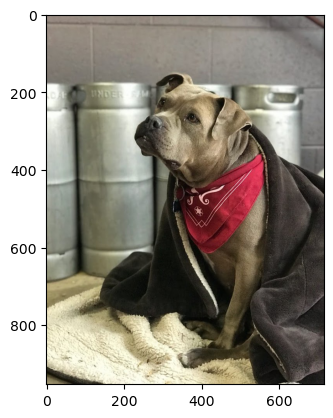

In [6]:
# convert image to numpy array and display
im = np.array(image)
plt.imshow(im)
plt.show()

In [7]:
# image cropping
center_row = im.shape[0] // 4
center_col = im.shape[1] // 4

In [8]:
print(type(im))
# <class 'numpy.ndarray'>

print(im.dtype)
# uint8

print(im.shape)
# (225, 400, 3)

<class 'numpy.ndarray'>
uint8
(953, 715, 3)


(953, 715)


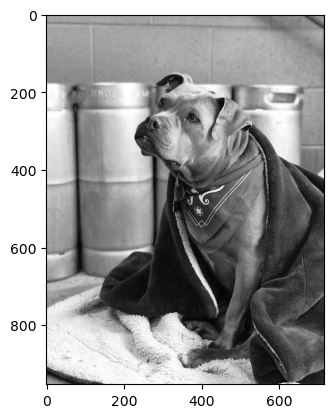

In [9]:
im_gray = np.mean(im, axis = 2)

print(im_gray.shape)
plt.imshow(im_gray, cmap='Greys_r')
plt.show()

# By default, matplotlib use a colormap which maps intensities to colors. To avoid this, use:
# plt.imshow(image, cmap='Greys_r')

(953, 715)


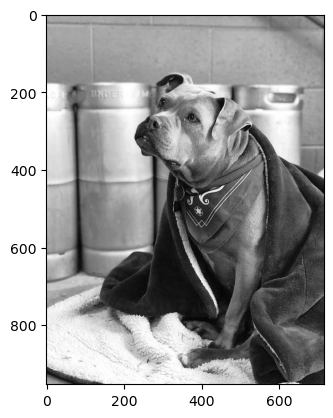

In [10]:
im_gray = np.array(image.convert('L'))
print(im_gray.shape)
plt.imshow(im_gray, cmap='Greys_r')
plt.show()

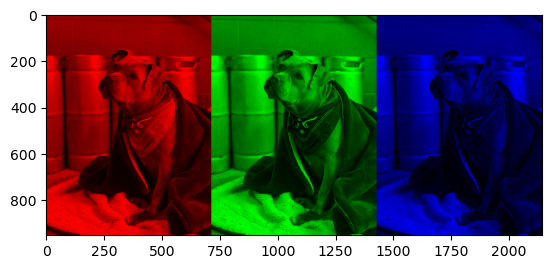

In [11]:
im_R = im.copy()
im_R[:, :, (1, 2)] = 0
im_G = im.copy()
im_G[:, :, (0, 2)] = 0
im_B = im.copy()
im_B[:, :, (0, 1)] = 0

im_RGB = np.concatenate((im_R, im_G, im_B), axis=1)
# im_RGB = np.hstack((im_R, im_G, im_B))
# im_RGB = np.c_['1', im_R, im_G, im_B]

plt.imshow(im_RGB)
plt.show()

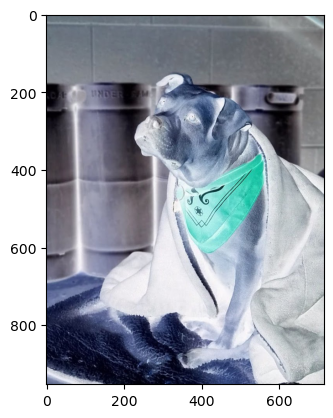

In [12]:
# Negative-positive inversion (invert pixel value)

im_i = 255 - im

plt.imshow(im_i)
plt.show()

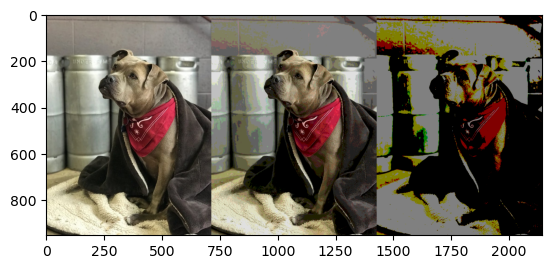

In [13]:
# Color reduction
im_32 = im // 32 * 32
im_128 = im // 128 * 128

im_dec = np.concatenate((im, im_32, im_128), axis=1)

plt.imshow(im_dec)
plt.show()

[[ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]
[[255 255 255 ... 255 255   0]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


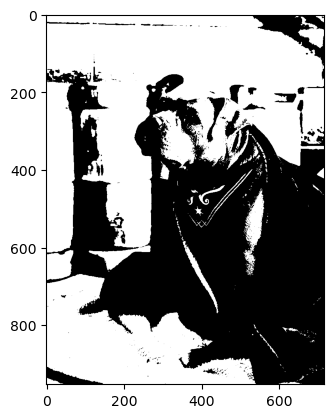

In [14]:
# Binarization
thresh = 120

im_bool = im_gray > thresh
print(im_bool)
# [[ True  True  True ...  True  True False]
#  [ True  True  True ...  True  True False]
#  [ True  True  True ...  True False False]
#  ...
#  [False False False ... False False False]
#  [False False False ... False False False]
#  [False False False ... False False False]]

maxval = 255

im_bin = (im_gray > thresh) * maxval
print(im_bin)
# [[255 255 255 ... 255 255   0]
#  [255 255 255 ... 255 255   0]
#  [255 255 255 ... 255   0   0]
#  ...
#  [  0   0   0 ...   0   0   0]
#  [  0   0   0 ...   0   0   0]
#  [  0   0   0 ...   0   0   0]]

plt.imshow(im_bin,  cmap='Greys_r')
plt.show()


In [15]:
# pad
# tile